# Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Attribute Information

Dat Source: https://github.com/dsrscientist/dataset1/blob/master/abalone.csv 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Abalone.csv")

In [3]:
df.columns

Index(['Sex', ' Length', ' Diamater', ' Height', ' Whole Weight',
       ' Shucked Weight', ' Visceara Weight', ' Shell Weight',
       ' Age in years Rings '],
      dtype='object')

1. For dependent variable - we have Age in years rings 

2. For Independent variables - we have Sex, Length, Diameter, Height, Whole Weight, Shucked weight, Visceara weight, shell weight. 

In [4]:
df.head()

,Sex,Length,Diamater,Height,Whole Weight,Shucked Weight,Visceara Weight,Shell Weight,Age in years Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.tail()

,Sex,Length,Diamater,Height,Whole Weight,Shucked Weight,Visceara Weight,Shell Weight,Age in years Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
df.shape

(4177, 9)

Total number of columns are 9 and 4177 number of rows are given in the dataset. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   4177 non-null   object 
 1    Length               4177 non-null   float64
 2    Diamater             4177 non-null   float64
 3    Height               4177 non-null   float64
 4    Whole Weight         4177 non-null   float64
 5    Shucked Weight       4177 non-null   float64
 6    Visceara Weight      4177 non-null   float64
 7    Shell Weight         4177 non-null   float64
 8    Age in years Rings   4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


All varaiables are in float and integer format, just sex variable is in object format. It needs to be encoded later. 

# Checking the null values: 

In [8]:
df.isnull().sum()

Sex                     0
 Length                 0
 Diamater               0
 Height                 0
 Whole Weight           0
 Shucked Weight         0
 Visceara Weight        0
 Shell Weight           0
 Age in years Rings     0
dtype: int64

Since no null values are present in the dataset, we can persue with the data. 

In [9]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

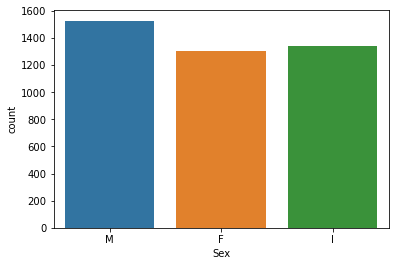

In [10]:
print(df['Sex'].value_counts())
sns.countplot(df['Sex'])

Observation: The data among the Sex variable is not quite balanced. 

In [11]:
df.describe()

,Length,Diamater,Height,Whole Weight,Shucked Weight,Visceara Weight,Shell Weight,Age in years Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observations: 
    
    1. The standard devataion is almost normal for all the independent variables. Keeping Threshold -3 to 3. 
    2. As per the maximum valaues and 50% - median value, it  is clear that data somewhere is not normally distributed. 
    3. Height has 0 as minimum height. 
    4. All variables except Sex is numerical in nature. 

# Exploratory Data Analysis:

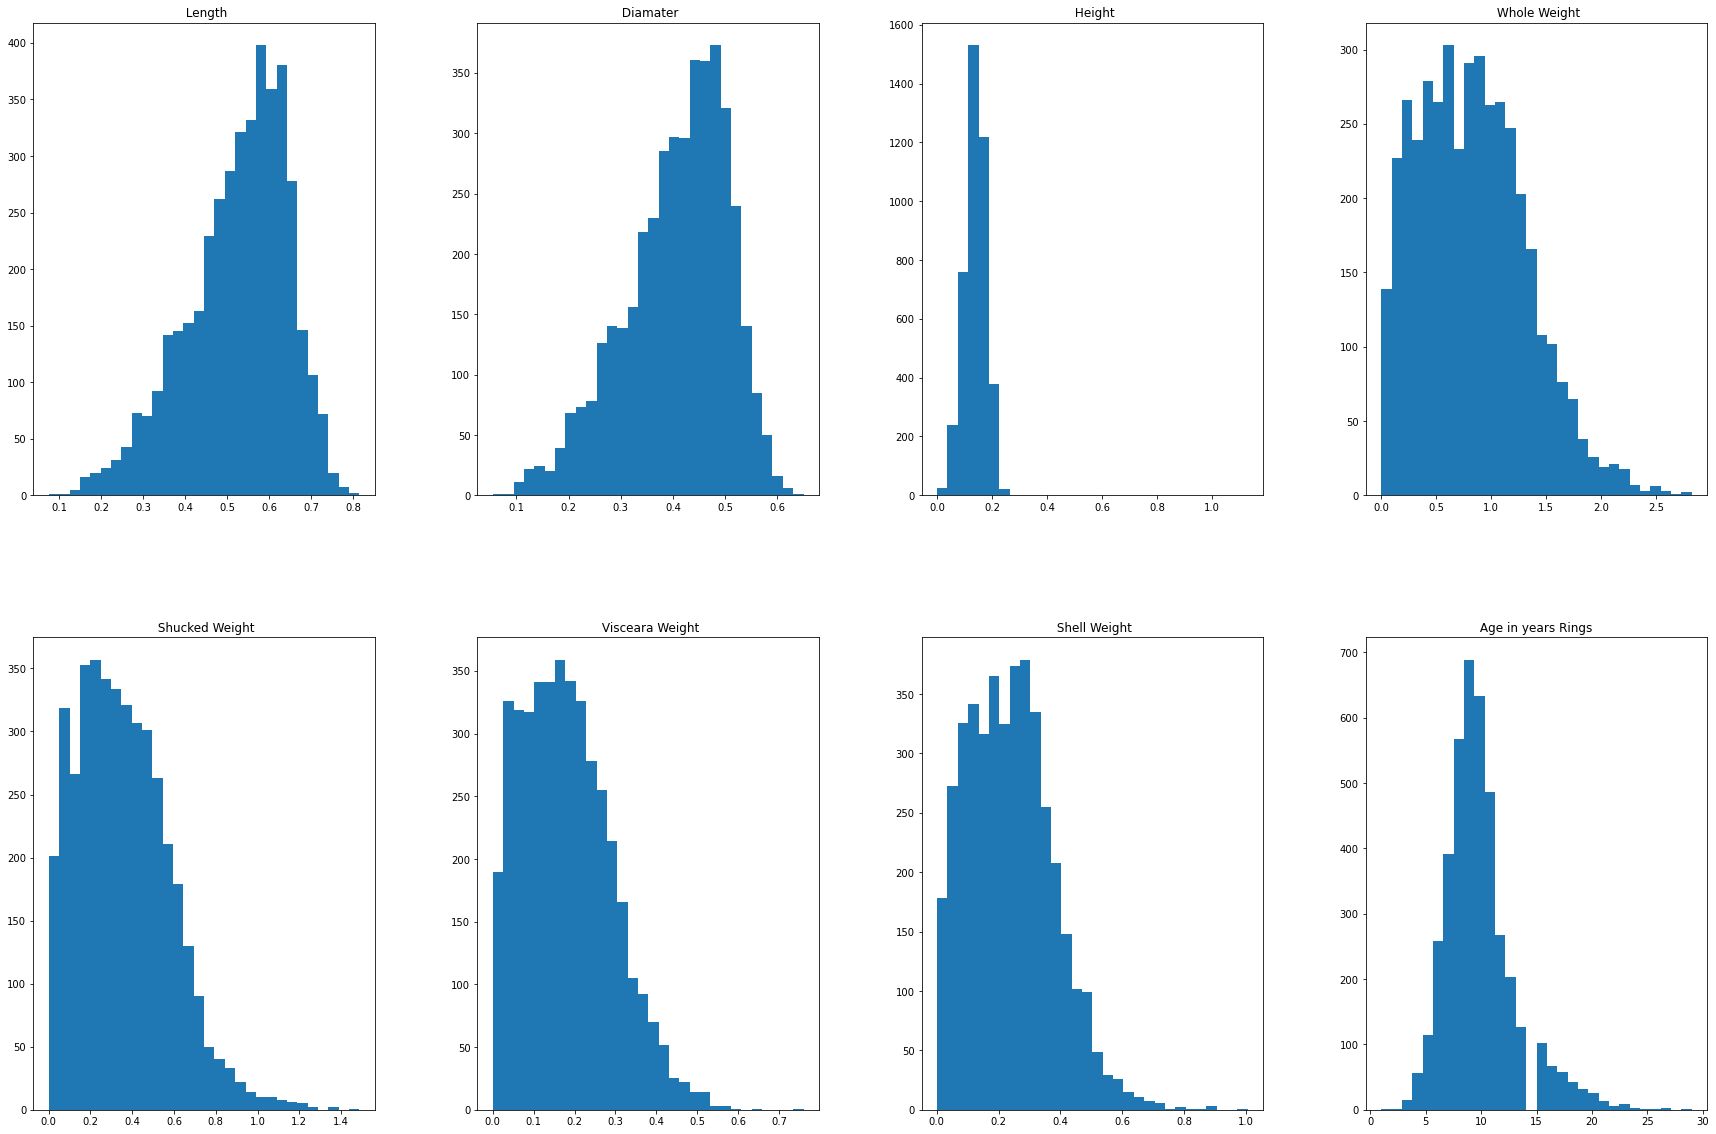

In [12]:
df.hist(figsize = (30,20), grid = False, layout = (2,4), bins = 30)
plt.show()

Observations: 
    
    From the histograms with respect to each respective variables - we are getting how data is distributed. 
    1. Length, Diameter, Height is quite normally distributed. 
    2. Whole Weight, Shucked weight, Viscara weight, and shell weight is skewed towards right.

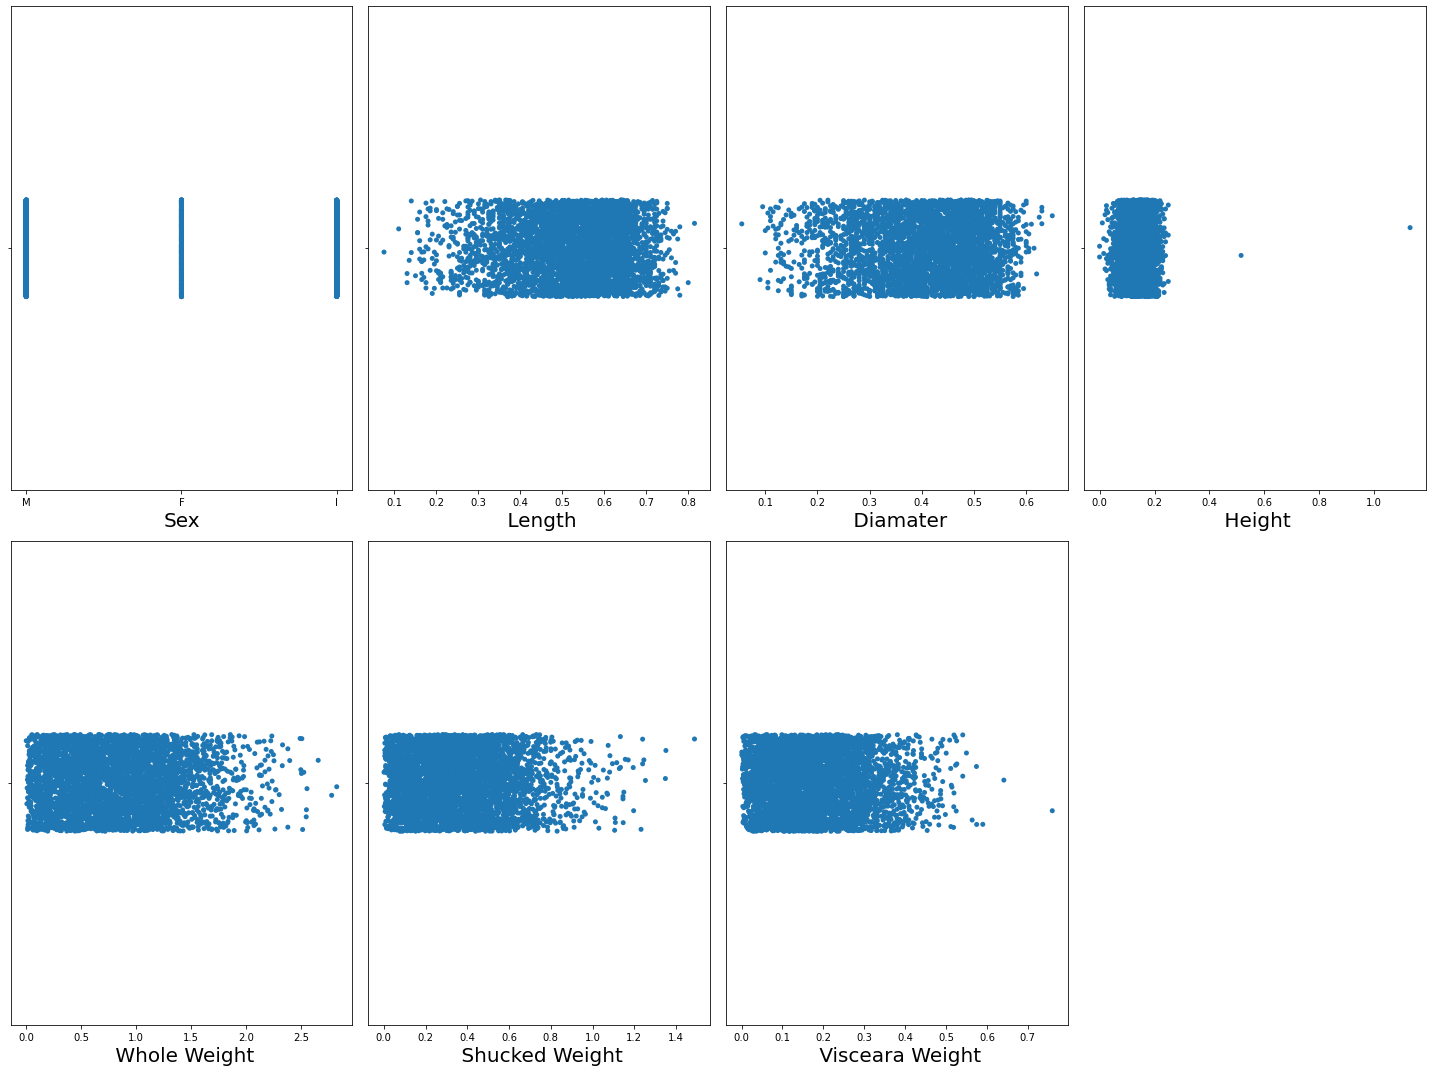

In [13]:
plt.figure(figsize=(20,15), facecolor = 'white', edgecolor = 'Black')
pln = 1 

for col in df: 
    if pln<8: 
        ax = plt.subplot(2,4,pln)
        sns.stripplot(df[col])
        plt.xlabel(col, fontsize = 20)
    pln += 1
plt.tight_layout()

Observations: 
    
    From the stripplot, we get the dimensions among which the variable data is distributed. 
    1. Length is normally ditributed between the range of 0.1 to 0.8. 
    2. Diamater is normally distributed between the range of 0.1 to 0.6. 
    3. Height is distributed from 0.0 to 0.2. 
    4. All weight is distributed within the range of 0.0 to 2.5. There are outliers present in the dataset. 

In [14]:
### Checking the skewness among the variables.
df.skew()

 Length                -0.639873
 Diamater              -0.609198
 Height                 3.128817
 Whole Weight           0.530959
 Shucked Weight         0.719098
 Visceara Weight        0.591852
 Shell Weight           0.620927
 Age in years Rings     1.114102
dtype: float64

Observation: 

Height does have positive skewness. All other variables are normally distributed and follows a standard normal distribution.

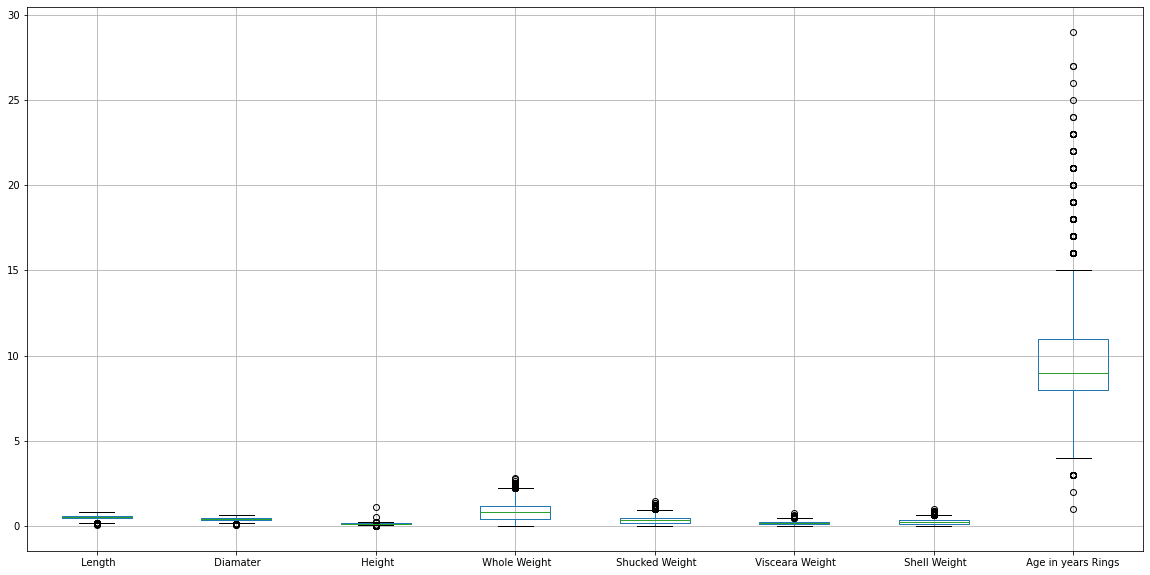

In [15]:
### Checking the outliers among the variables. 
df.boxplot(figsize=(20,10))
plt.show()

Observation: 
    
    The independent variables doesn't have that much outliers in the distribution but the target variable does have the high number of outliers present in the distribution. 

In [16]:
df.columns

Index(['Sex', ' Length', ' Diamater', ' Height', ' Whole Weight',
       ' Shucked Weight', ' Visceara Weight', ' Shell Weight',
       ' Age in years Rings '],
      dtype='object')

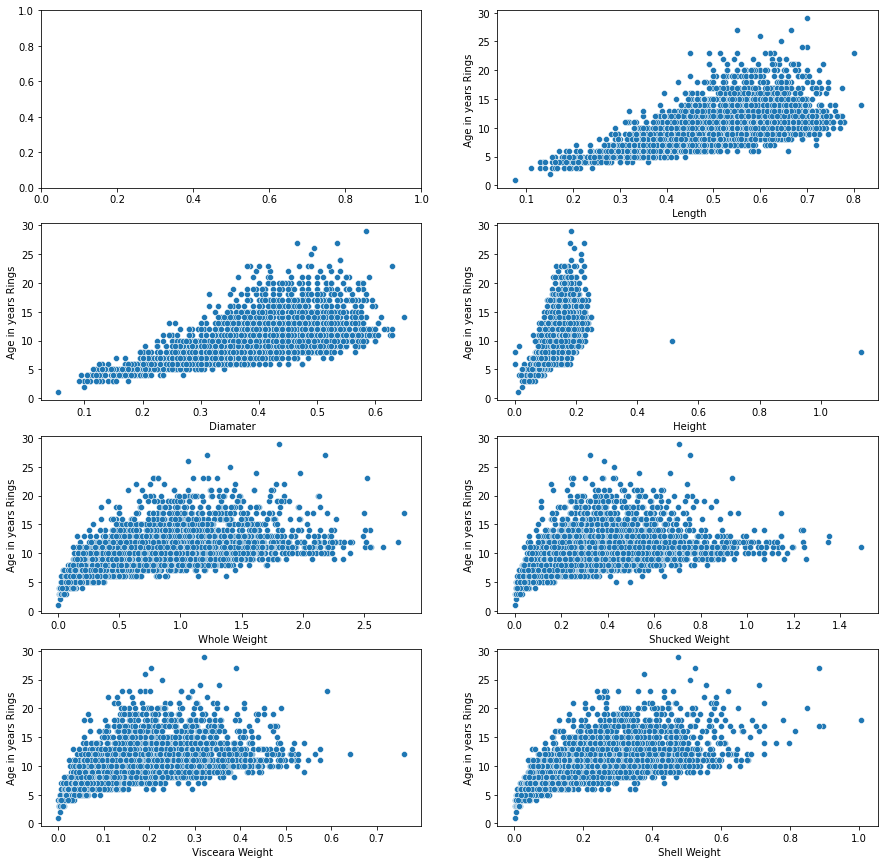

In [17]:
fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.scatterplot(x=df.iloc[:,i], y=df[' Age in years Rings '], ax=axes[i])

plt.show()

Observation: 
    
    1. As per the length, weights and diameter variables, when lenght, diameter and weight is increasing --> age is increasing as well. 
    2. There is not much significance of the height on the age, since it lies from 0.0 to 0.2. 

In [18]:
### Checking the correlation among the variables now. 

df.corr()

,Length,Diamater,Height,Whole Weight,Shucked Weight,Visceara Weight,Shell Weight,Age in years Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diamater,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Visceara Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age in years Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

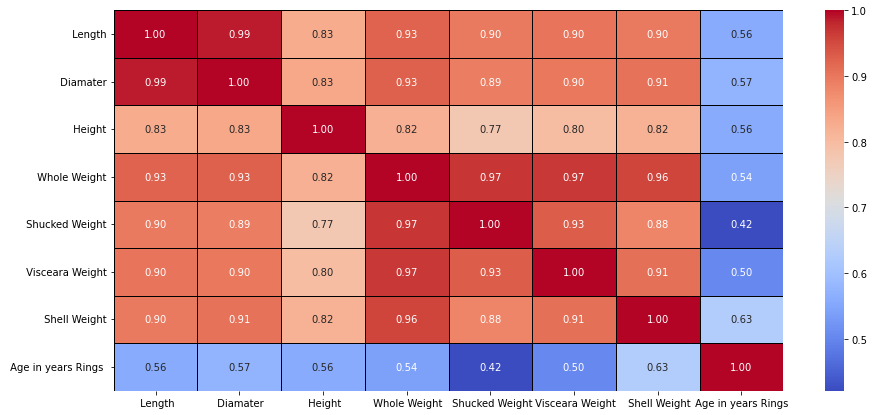

In [19]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, linecolor  = "black", fmt='.2f',cmap = 'coolwarm')

Observatons: 
    
    1. Length and weights varaibles are highly correlated to the diameter->They are 90% to 98% correlated with the diameter. 
    2. With age, shell weight is highly correlated by 62%. 

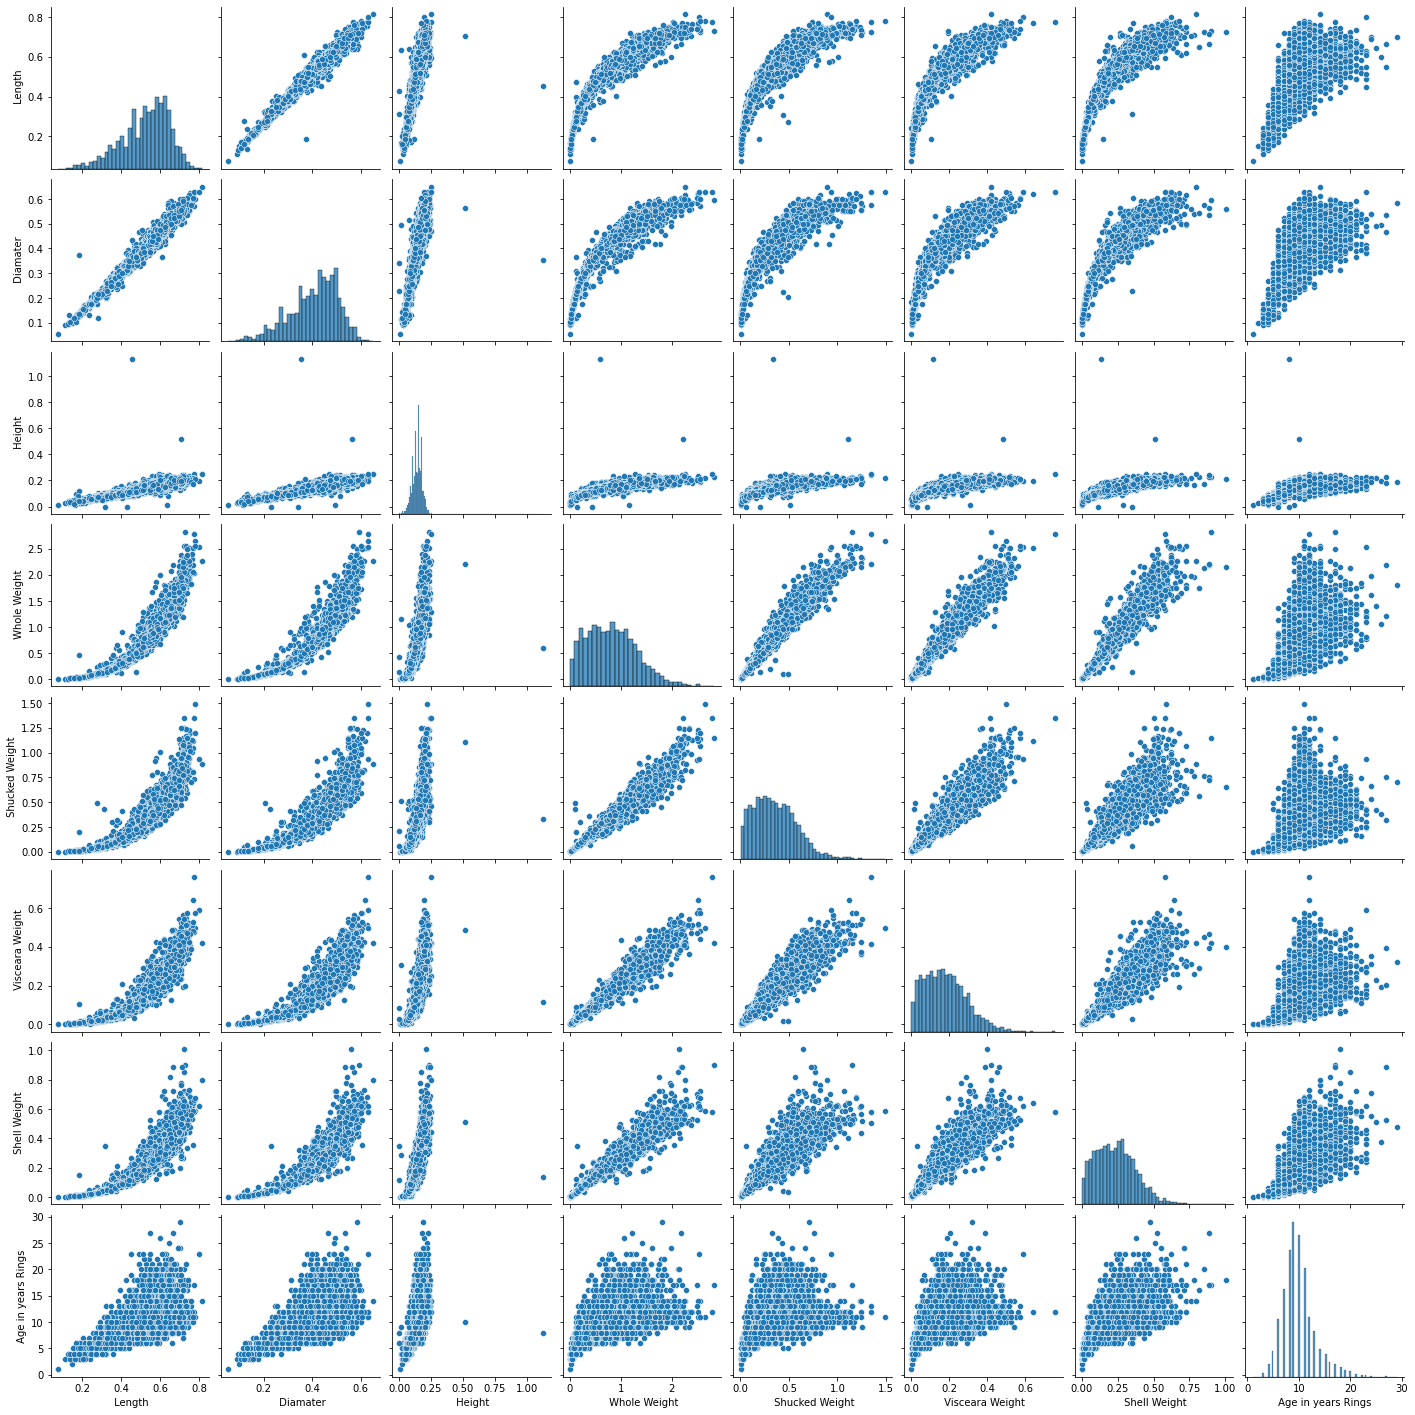

In [20]:
sns.pairplot(df)

# Preprocessing the data now - 

In [21]:
### Chainging the data type of Sex variable from object to the integer. 
le = LabelEncoder()

In [22]:
df['Sex'] = le.fit_transform(df['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

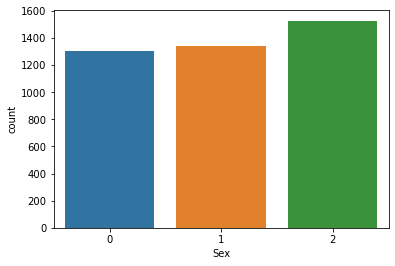

In [23]:
sns.countplot(df['Sex'])

In [24]:
df.dtypes

Sex                       int32
 Length                 float64
 Diamater               float64
 Height                 float64
 Whole Weight           float64
 Shucked Weight         float64
 Visceara Weight        float64
 Shell Weight           float64
 Age in years Rings       int64
dtype: object

In [25]:
### Removing the outliers with Z-Score method. 
from scipy.stats import zscore 
z = np.abs(zscore(df))

In [26]:
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [27]:
df_new = df[(z<3).all(axis=1)]

In [28]:
df_new.shape

(4027, 9)

In [29]:
df.shape

(4177, 9)

In [30]:
print("Total number of rows dropped due to having high zscore : 150. ")

Total number of rows dropped due to having high zscore : 150. 


In [31]:
df = df_new

<AxesSubplot:ylabel='Density'>

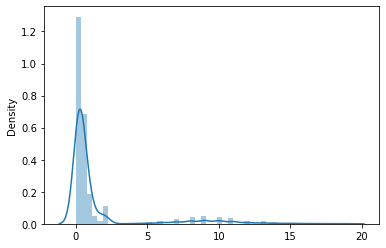

In [32]:
### Checking the distribution of the variables again. 

sns.distplot(df)

In [33]:
df.skew().sort_values()

 Length                -0.623076
 Diamater              -0.598650
 Height                -0.244251
Sex                    -0.094886
 Whole Weight           0.334204
 Shell Weight           0.349471
 Visceara Weight        0.437116
 Shucked Weight         0.458295
 Age in years Rings     0.725464
dtype: float64

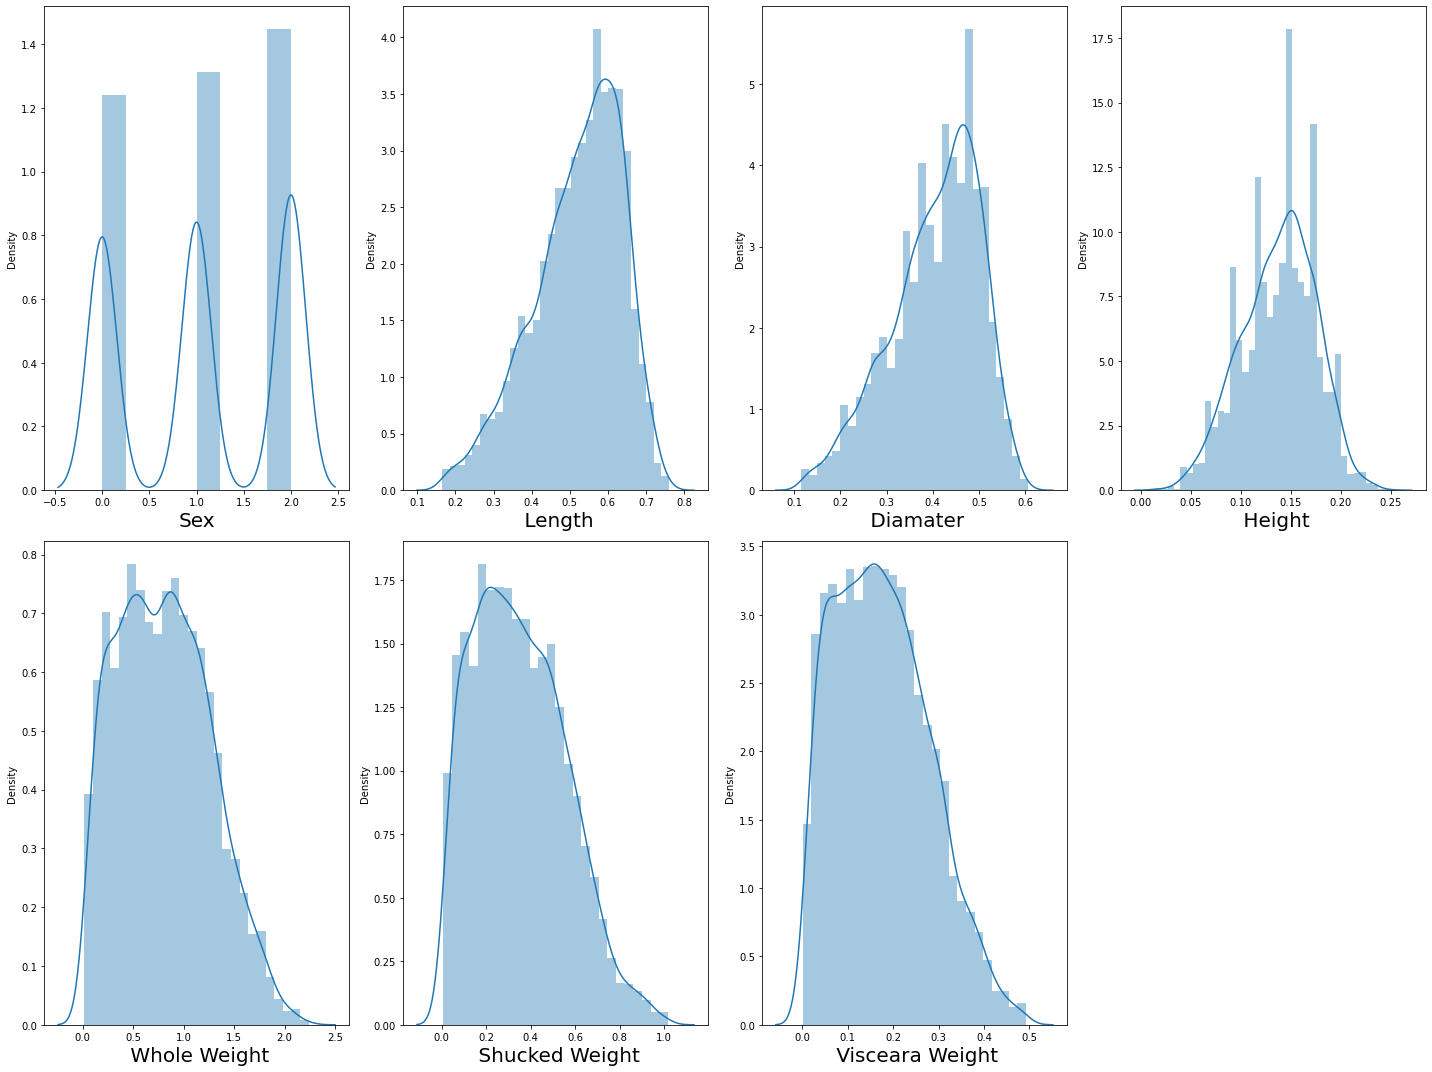

In [34]:
plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1 

for column in df:
    if plotnumber <8:
        ax = plt.subplot (2,4, plotnumber)
        sns.distplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

Observation: Now there is symmetry in the distribution --> It is normally distributed, all the outliers are removed from the data. 

In [35]:
### Removing the skewness with power transformation method. 
## First dividing the data into x and y. 

x = df.iloc[:, :-1]  ## Features
y = df.iloc[:, -1]   ## Target

In [36]:
from sklearn.preprocessing import power_transform
x = power_transform(x, method ='yeo-johnson')
x

array([[ 1.13432919, -0.68445079, -0.54337947, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.40113174, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 ,  0.03716259, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  0.70592133, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.8377131 , ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.85550496, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [37]:
pd.DataFrame(x).skew()

0   -0.174523
1   -0.082985
2   -0.080956
3   -0.015962
4   -0.016797
5    0.021815
6    0.035902
7    0.016660
dtype: float64

In [38]:
x = pd.DataFrame(x, columns = ['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'])

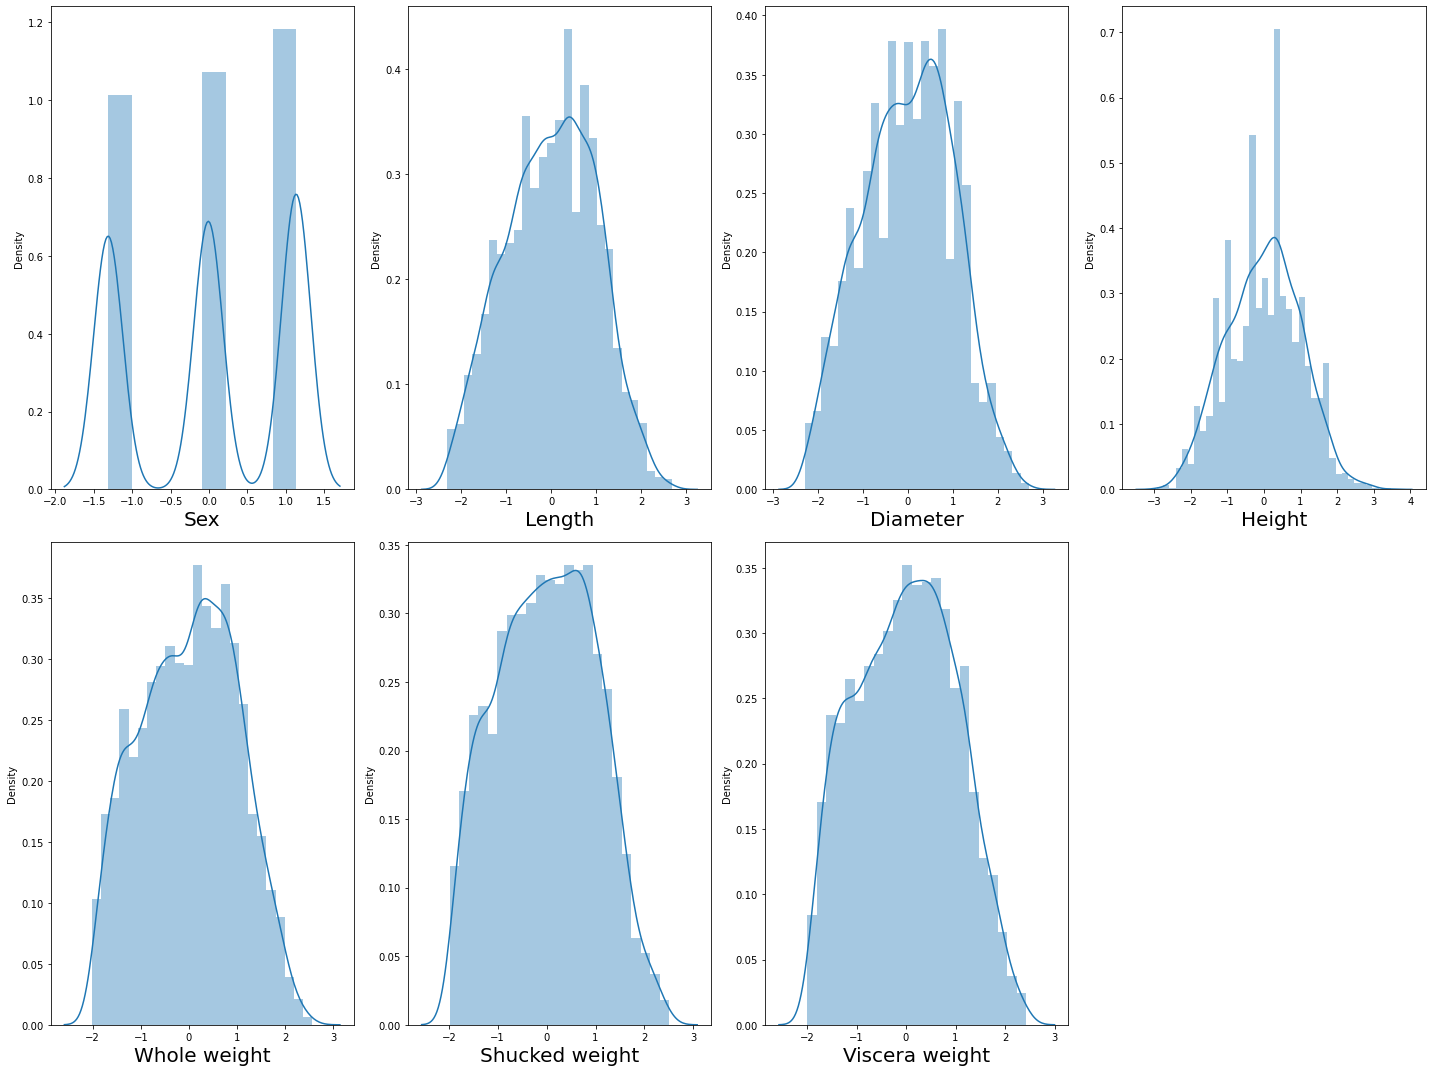

In [39]:
## Checking the distribution again with the distanceplot. 


plt.figure(figsize = (20,15), facecolor = 'White')
plotnumber = 1 #this is an initiator

for column in x:
    if plotnumber <8: #here 8 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.distplot (x [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

Observation:: 
        
        Now data is normally distributed between the range of -3 to +3. No skewness is available in data anymore. 

In [42]:
### Standarising the variables now. 

In [43]:
scaler = StandardScaler()
x_ = scaler.fit_transform(x)
x_

array([[ 1.13432919, -0.68445079, -0.54337947, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.40113174, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 ,  0.03716259, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  0.70592133, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.8377131 , ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.85550496, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [44]:
### Checking multicolinerity now. 
## If there is then we will remove or drop the variables. 

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor (x_, i) for i in range (x_.shape[1])]
vif["Features"] = x.columns 
vif

,VIF,Features
0,1.013199,Sex
1,34.538446,Length
2,33.515527,Diameter
3,6.524799,Height
4,136.046977,Whole weight
5,36.257857,Shucked weight
6,21.937509,Viscera weight
7,30.127367,Shell weight


Observation: Whole Weight does have high multicollinerity then we will drop it. 

In [47]:
x = x.drop(columns = ['Whole weight'])
x

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight
0,1.134329,-0.684451,-0.543379,-1.158933,-0.540865,-0.688032,-0.586354
1,1.134329,-1.411739,-1.401132,-1.280406,-1.311318,-1.332854,-1.332717
2,-1.313068,-0.046219,0.037163,-0.128305,-0.362705,-0.240373,-0.080214
3,1.134329,-0.799651,-0.543379,-0.395963,-0.592261,-0.539936,-0.542533
4,-0.008746,-1.530577,-1.474343,-1.518600,-1.378735,-1.451548,-1.482926
...,...,...,...,...,...,...,...
4022,-1.313068,0.289495,0.390420,0.716250,0.217107,0.690782,0.227258
4023,1.134329,0.545081,0.269661,-0.128305,0.534924,0.474179,0.314936
4024,1.134329,0.651129,0.705921,1.943633,0.901897,1.089651,0.663632
4025,-1.313068,0.926064,0.837713,0.286070,0.924153,0.876428,0.577520


# Model Selection and Making Instance: 

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .25, random_state = 30)

In [50]:
#### Linear Regression
lr = LinearRegression()

In [51]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [52]:
lr.score(xtrain,ytrain)     #Training score of the model

0.5041234933509378

In [55]:
lr.score(xtest,ytest)      #Testing score of the model

0.4728164211049706

In [53]:
pred = lr.predict(xtest)

In [56]:
print("Coefficent of determination: ", r2_score(ytest, pred)*100)

Coefficent of determination:  47.28164211049706


In [57]:
#### Ridge 
rd = Ridge(alpha = 0.001, normalize = True)
rd.fit(xtrain,ytrain)

Ridge(alpha=0.001, normalize=True)

In [58]:
rpred = rd.predict(xtest)
rd.score(xtrain, ytrain)

0.5040999376536976

In [59]:
print("Coefficent of determination: ", r2_score(ytest, rpred)*100)

Coefficent of determination:  47.30760947591916


In [62]:
### SVR 
s = SVR(kernel = 'linear')
s.fit(xtrain, ytrain)
spred = s.predict(xtest)

In [63]:
print("Coefficent of determination: ", r2_score(ytest, spred)*100)

Coefficent of determination:  46.52037352374023


In [64]:
### KNN Regressor 
knn = KNeighborsRegressor(n_neighbors =4 )
knn.fit(xtrain, ytrain)
kpred = knn.predict(xtest)

In [65]:
print("Coefficent of determination: ", r2_score(ytest, kpred)*100)

Coefficent of determination:  44.41546384147503


In [66]:
### Random Forest Regressor 
rf = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)
rf.fit(xtrain, ytrain)
rpred = rf.predict(xtest)

In [67]:
print("Coefficent of determination: ", r2_score(ytest, rpred)*100)

Coefficent of determination:  39.88236696530733


In [68]:
### Gradient Boosting Regressor 
gbr = GradientBoostingRegressor()
gbr.fit(xtrain, ytrain)
gpred = gbr.predict(xtest)

In [69]:
print("Coefficent of determination: ", r2_score(ytest, gpred)*100)

Coefficent of determination:  51.945168491975544


# The highest R2 score is 51.95 coming with Gradient Boosting Regressor. 

In [71]:
### Saving the model now. 
# pickeling or serialization of a file
import pickle
filename = 'Abalonecasestudy.pkl'
pickle.dump(gbr, open(filename, 'wb'))


# Thank you - The End!